In [204]:
import tweets
import pandas as pd
import plotly.express as px
from itertools import chain
import matplotlib.pyplot as plt

In [205]:
tweets1 = pd.read_csv("../data/tweets1.csv").drop_duplicates()
users1 = pd.read_csv("../data/users1.csv").drop_duplicates()

## Hashtags

First, we have to collect all of the hashtags. The dataset is misleading in that the hashtags column appears to consist strictly of lists. However, they are strings.

### Initial Quantity Analysis

First, we wanted to see the most popular tags in general.

In [206]:
hashtags = ""
for hashtag in tweets1["hashtags"]:
    if type(hashtag)==float:
        continue
    else: 
        hashtags += (" " +hashtag.replace("[", "").replace("]", "").replace("'", ""))

In [207]:
hashtags = [x for x in hashtags.split(" ") if x != ""]

In [208]:
hashtags_charted = pd.DataFrame(hashtags).reset_index().groupby(0)["index"].agg('count').to_frame().reset_index().sort_values("index", ascending=False)
hashtags_charted.columns = ["hashtags", "count"]

In [217]:
fig = px.bar(hashtags_charted.head(30), x="count", y="hashtags", orientation='h')
fig.show()

### Trending Over Time

Then, we wanted to see trending tweets over time.

In [210]:
tweets1["hashtags"] = tweets1["hashtags"].apply(lambda x: x if type(x) == float 
                          else x.replace("'", "")
                          .replace("[", "")
                          .replace("]", "")
                          .replace(",", "")
                          .split(" ")
                         )

In [211]:

tweets1["tweet_time"] = pd.to_datetime(tweets1["tweet_time"])
hashtag_date = tweets1[["hashtags", "tweet_time"]]
hashtag_date["tweet_time"] = hashtag_date["tweet_time"].apply(lambda x: str(x.year)+"-" +str(x.month))
hashtag_date = hashtag_date.groupby("tweet_time")["hashtags"].apply(list).to_frame().reset_index()
hashtag_date["hashtags"] = hashtag_date["hashtags"].apply(lambda x: [y for y in x if (type(y) == list and len(y) != 0)])
hashtag_date["hashtags"] = hashtag_date["hashtags"].apply(lambda A: [x for x in list(chain.from_iterable(A)) if x!= ''])
hashtag_date = hashtag_date.explode("hashtags").reset_index().groupby(["tweet_time", "hashtags"])["index"].agg("count").to_frame().reset_index()
hashtag_date.columns = ["tweet_time", "hashtags", "count"]
dates = sorted(hashtag_date["tweet_time"].unique())[-21:]


<ipython-input-211-d8fe5a19e22d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



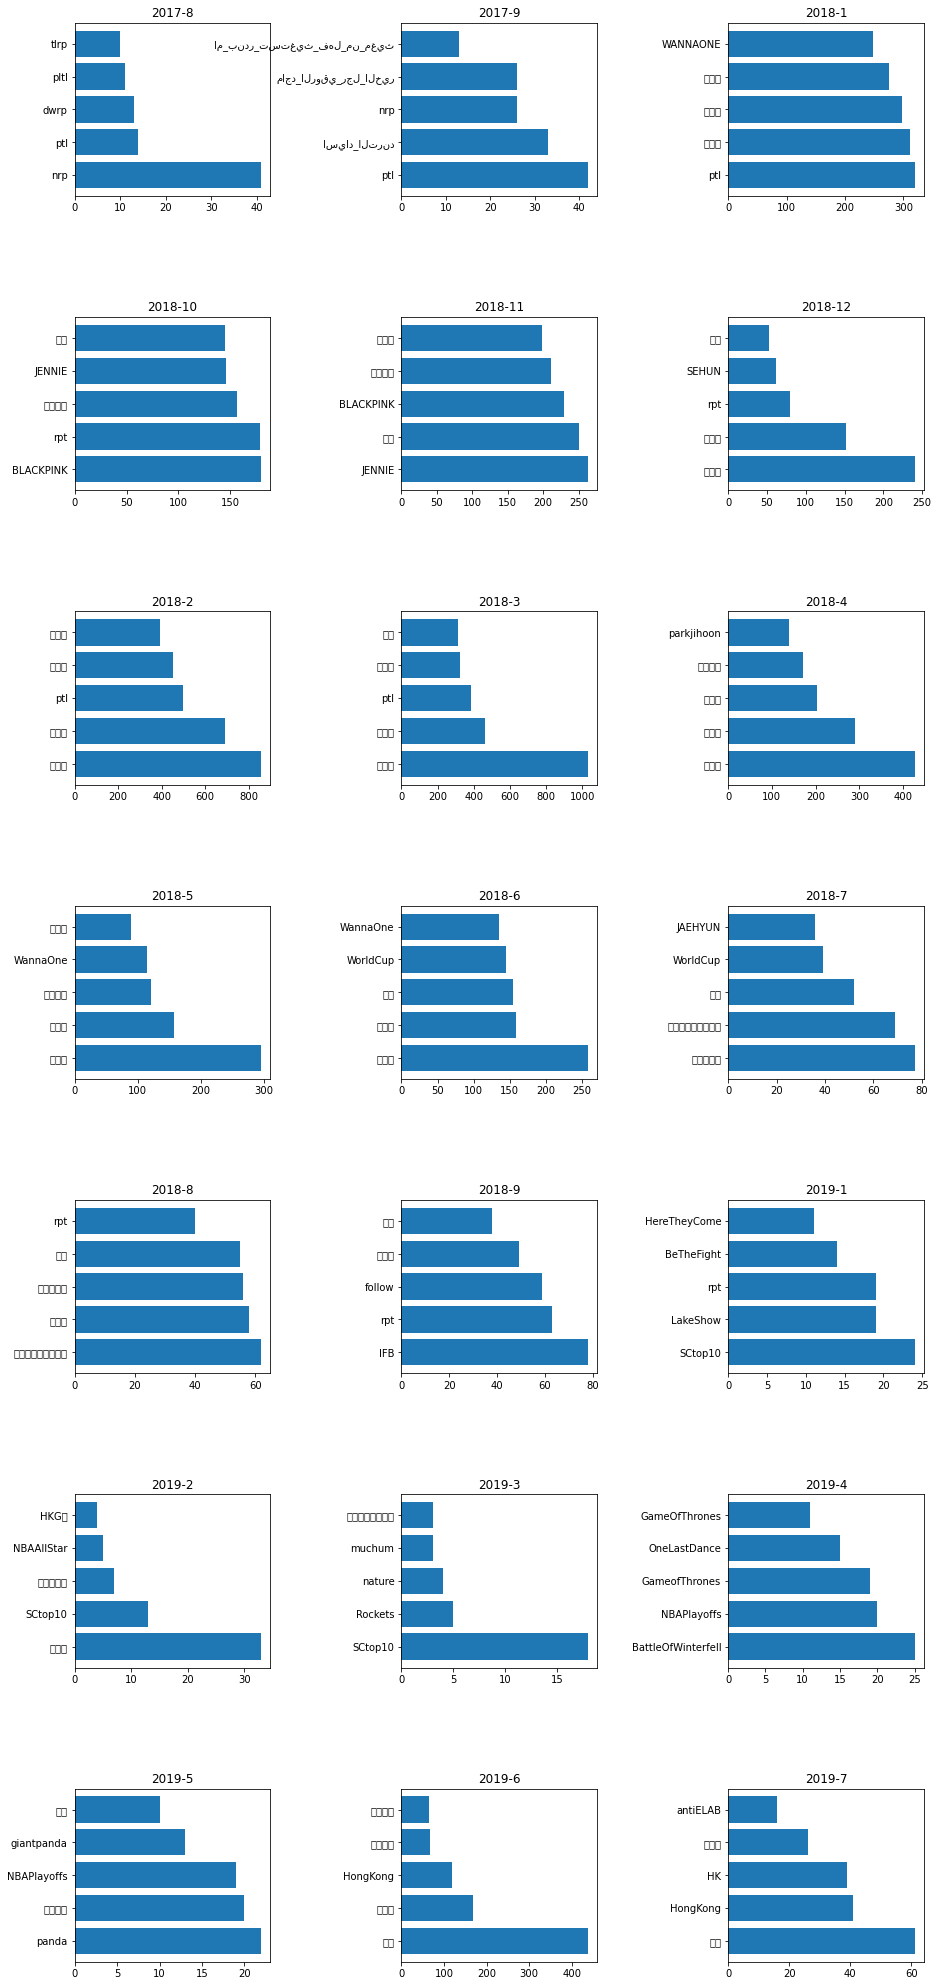

In [212]:
nrow = 7
ncol = 3
i = 0
fig, ax = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(30)
fig.set_figwidth(15)
fig.tight_layout(pad=10.0)
plt.rcParams["font.family"] = 'WenQuanYi Micro Hei'
for r in range(nrow):
    for c in range(ncol):
        single_date = hashtag_date.loc[hashtag_date["tweet_time"] == dates[i]].sort_values("count", ascending=False).head(5)
        ax[r,c].barh(single_date["hashtags"], single_date["count"])
        ax[r,c].set_title(dates[i])
        i+=1